**Import Libraries**

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import librosa
import IPython.display as ipd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

**Load Dataset**

In [2]:
#Reading the csv file
df = pd.read_csv("Data/features_3_sec.csv")

In [3]:
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

**Data Preprocessing**

In [4]:
df.shape

(9990, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

**Missing values in the dataset**

In [6]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

**Statistics of the dataset**

In [7]:
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

**Target Feature**

In [8]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


index  label
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

# **Data Analysis and Visualization**

# **Blues**

In [9]:
audio_path = 'Data/genres_original/blues/blues.00000.wav'
x , sr = librosa.load(audio_path)
print(x.shape, sr)

(661794,) 22050


**Audio of Blue**

In [10]:

ipd.Audio(audio_path)

Text(0.5, 1.0, 'sound wave on Blue')

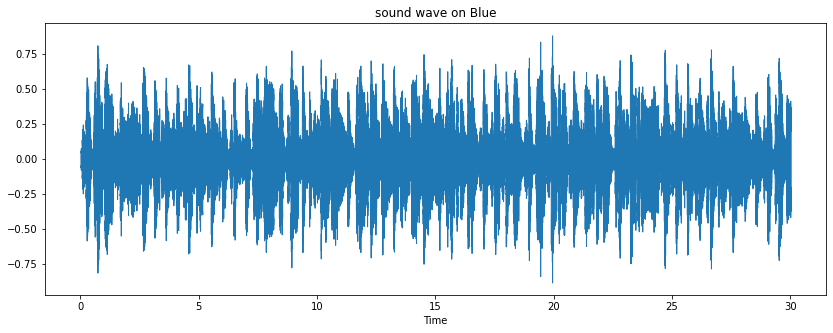

In [11]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title("sound wave on Blue")

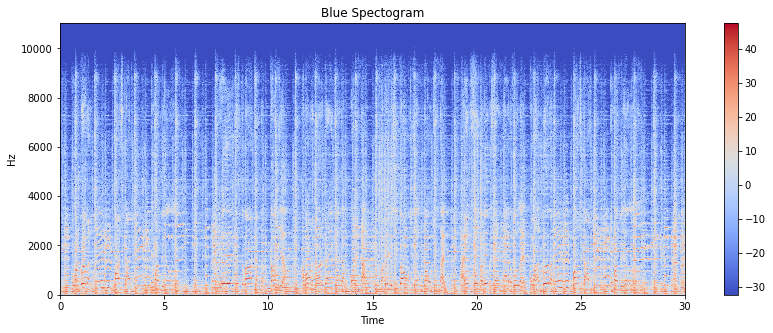

In [12]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title("Blue Spectogram")
plt.colorbar()

# **Classical**

In [13]:
audio_path = 'Data/genres_original/classical/classical.00000.wav'
x1 , sr1 = librosa.load(audio_path)
print(type(x), type(sr))

print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


**Audio of Classical**

In [14]:

ipd.Audio(audio_path)

Text(0.5, 1.0, 'Sound Wave on Classical')

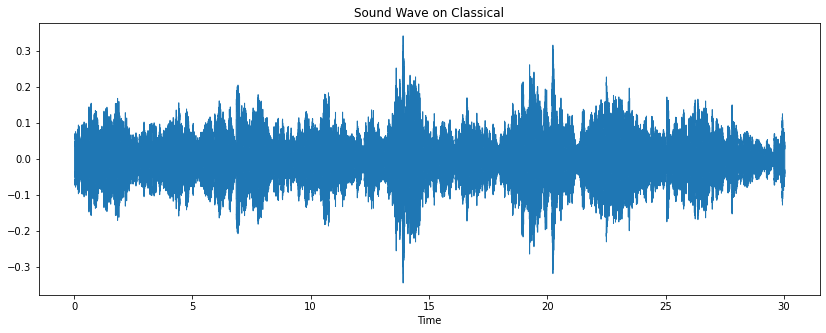

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x1, sr=sr1)
plt.title("Sound Wave on Classical")

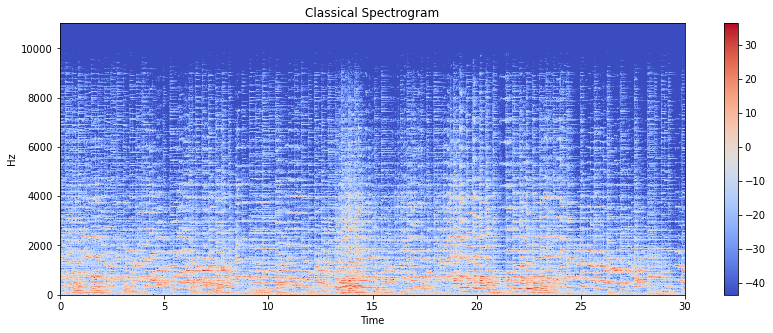

In [16]:
X = librosa.stft(x1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title("Classical Spectrogram")
plt.colorbar()

# **Country**

In [17]:
y, s = librosa.load('Data/genres_original/country/country.00000.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', s, '\n')

print('Check Len of Audio:', 661794/22050)

y: [-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] 

y shape: (663300,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [18]:
audio, _ = librosa.effects.trim(y)

print('Audio File:', audio, '\n')
print('Audio File shape:', np.shape(audio))

Audio File: [-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] 

Audio File shape: (663300,)


/var/folders/lt/bnh9499s113_399jyzcxrwzh0000gn/T/ipykernel_20921/2201725231.py:2: FutureWarning: Pass y=[-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(y, sr=s)


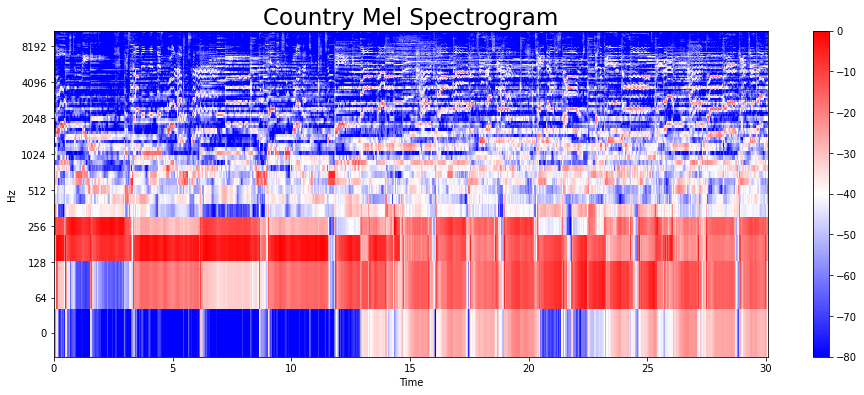

In [19]:
hl = 512
mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Country Mel Spectrogram", fontsize = 23);

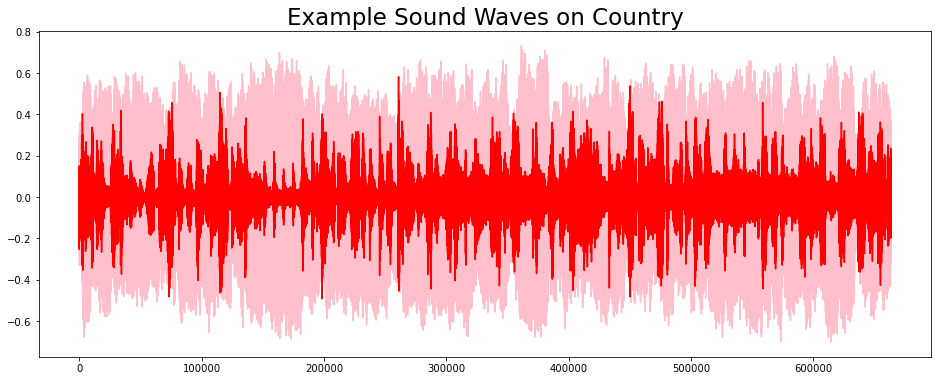

In [20]:
y_harm, y_perc = librosa.effects.hpss(audio)

plt.figure(figsize = (16, 6))
plt.plot(y_harm,color='pink');
plt.title("")
plt.plot(y_perc,color='red');
plt.title("Example Sound Waves on Country", fontsize = 23);

**HipHop**

/var/folders/lt/bnh9499s113_399jyzcxrwzh0000gn/T/ipykernel_20921/2323805701.py:6: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(y, sr=s)


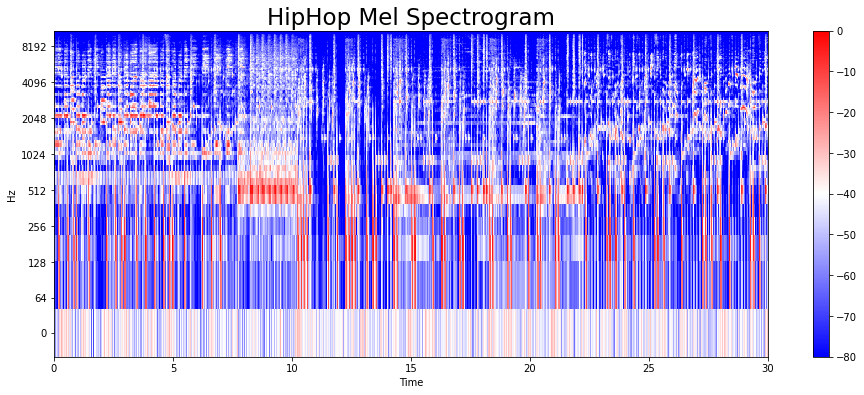

In [21]:
y, s = librosa.load('Data/genres_original/hiphop/hiphop.00000.wav')
# y, z = librosa.effects.trim(y)


hl = 512
mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("HipHop Mel Spectrogram", fontsize = 23);

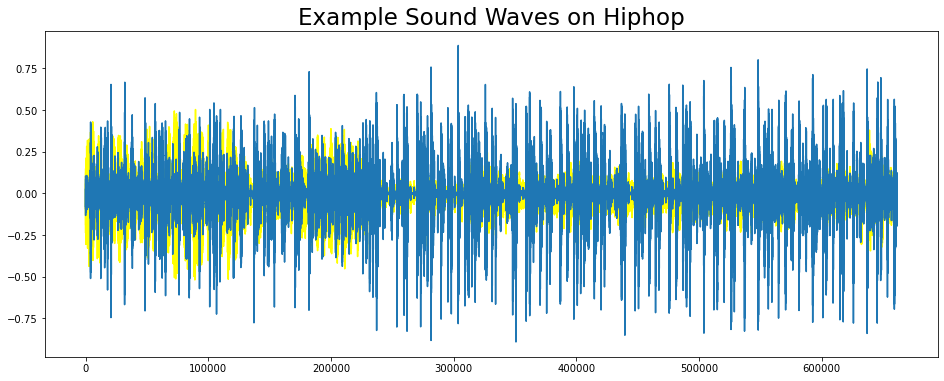

In [22]:
audio, _ = librosa.effects.trim(y)
y_harm, y_perc = librosa.effects.hpss(audio)

plt.figure(figsize = (16, 6))
plt.plot(y_harm,color='yellow');
plt.title("")
plt.plot(y_perc);
plt.title("Example Sound Waves on Hiphop", fontsize = 23);

# **Rock**

/var/folders/lt/bnh9499s113_399jyzcxrwzh0000gn/T/ipykernel_20921/1972120973.py:4: FutureWarning: Pass y=[-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(y, sr=s)


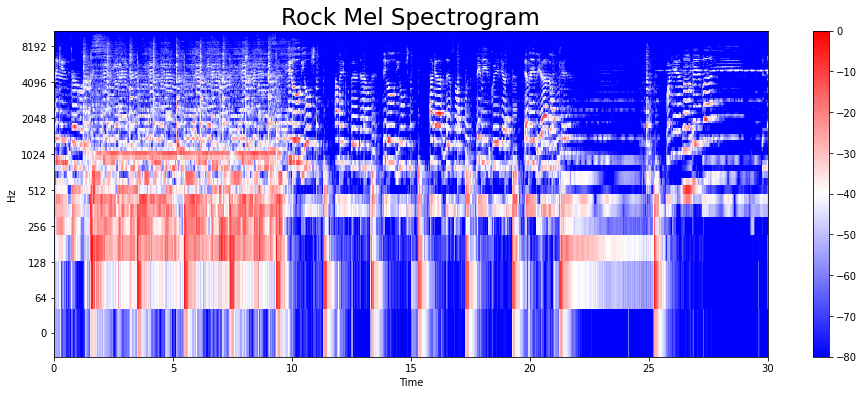

In [23]:


y, s = librosa.load('Data/genres_original/rock/rock.00000.wav')
# y, z = librosa.effects.trim(y)

mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Rock Mel Spectrogram", fontsize = 23);

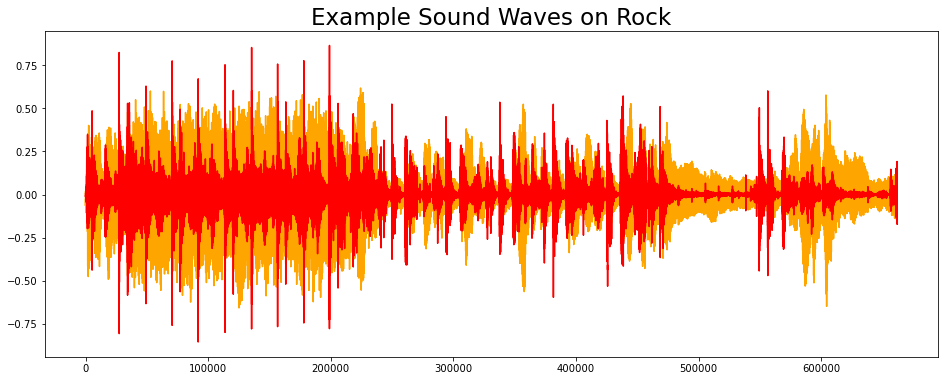

In [24]:
audio, _ = librosa.effects.trim(y)
y_harm, y_perc = librosa.effects.hpss(audio)

plt.figure(figsize = (16, 6))
plt.plot(y_harm,color='orange');
plt.title("")
plt.plot(y_perc,color='red');
plt.title("Example Sound Waves on Rock", fontsize = 23);

# **Pop**

/var/folders/lt/bnh9499s113_399jyzcxrwzh0000gn/T/ipykernel_20921/2080205424.py:4: FutureWarning: Pass y=[-0.0887146  -0.09524536 -0.10275269 ...  0.04016113  0.03860474
  0.02639771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(y, sr=s)


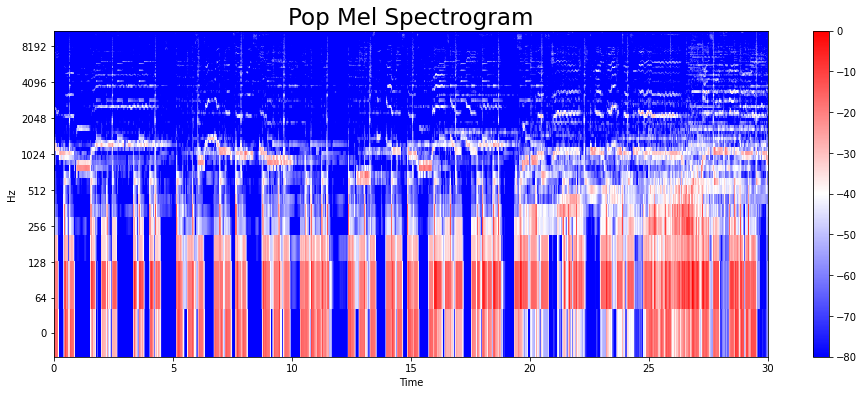

In [25]:
y, s = librosa.load('Data/genres_original/pop/pop.00000.wav')
y, z = librosa.effects.trim(y)

mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Pop Mel Spectrogram", fontsize = 23);

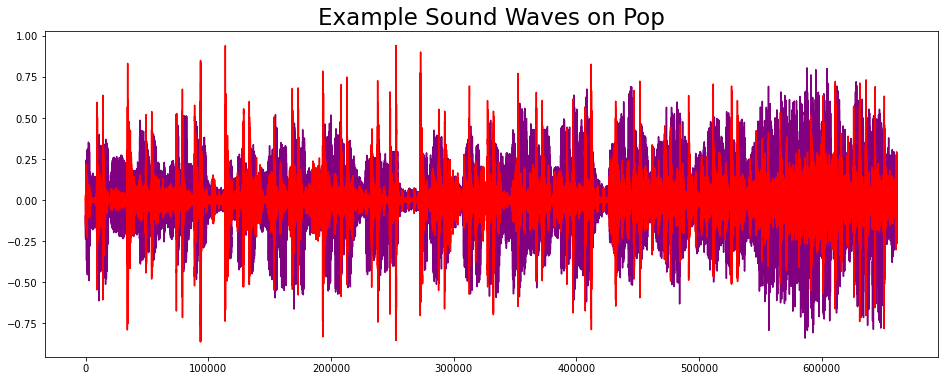

In [26]:
audio, _ = librosa.effects.trim(y)
y_harm, y_perc = librosa.effects.hpss(audio)

plt.figure(figsize = (16, 6))
plt.plot(y_harm,color='purple');
plt.title("")
plt.plot(y_perc,color='red');
plt.title("Example Sound Waves on Pop", fontsize = 23);

**Feature selection**

<AxesSubplot:>

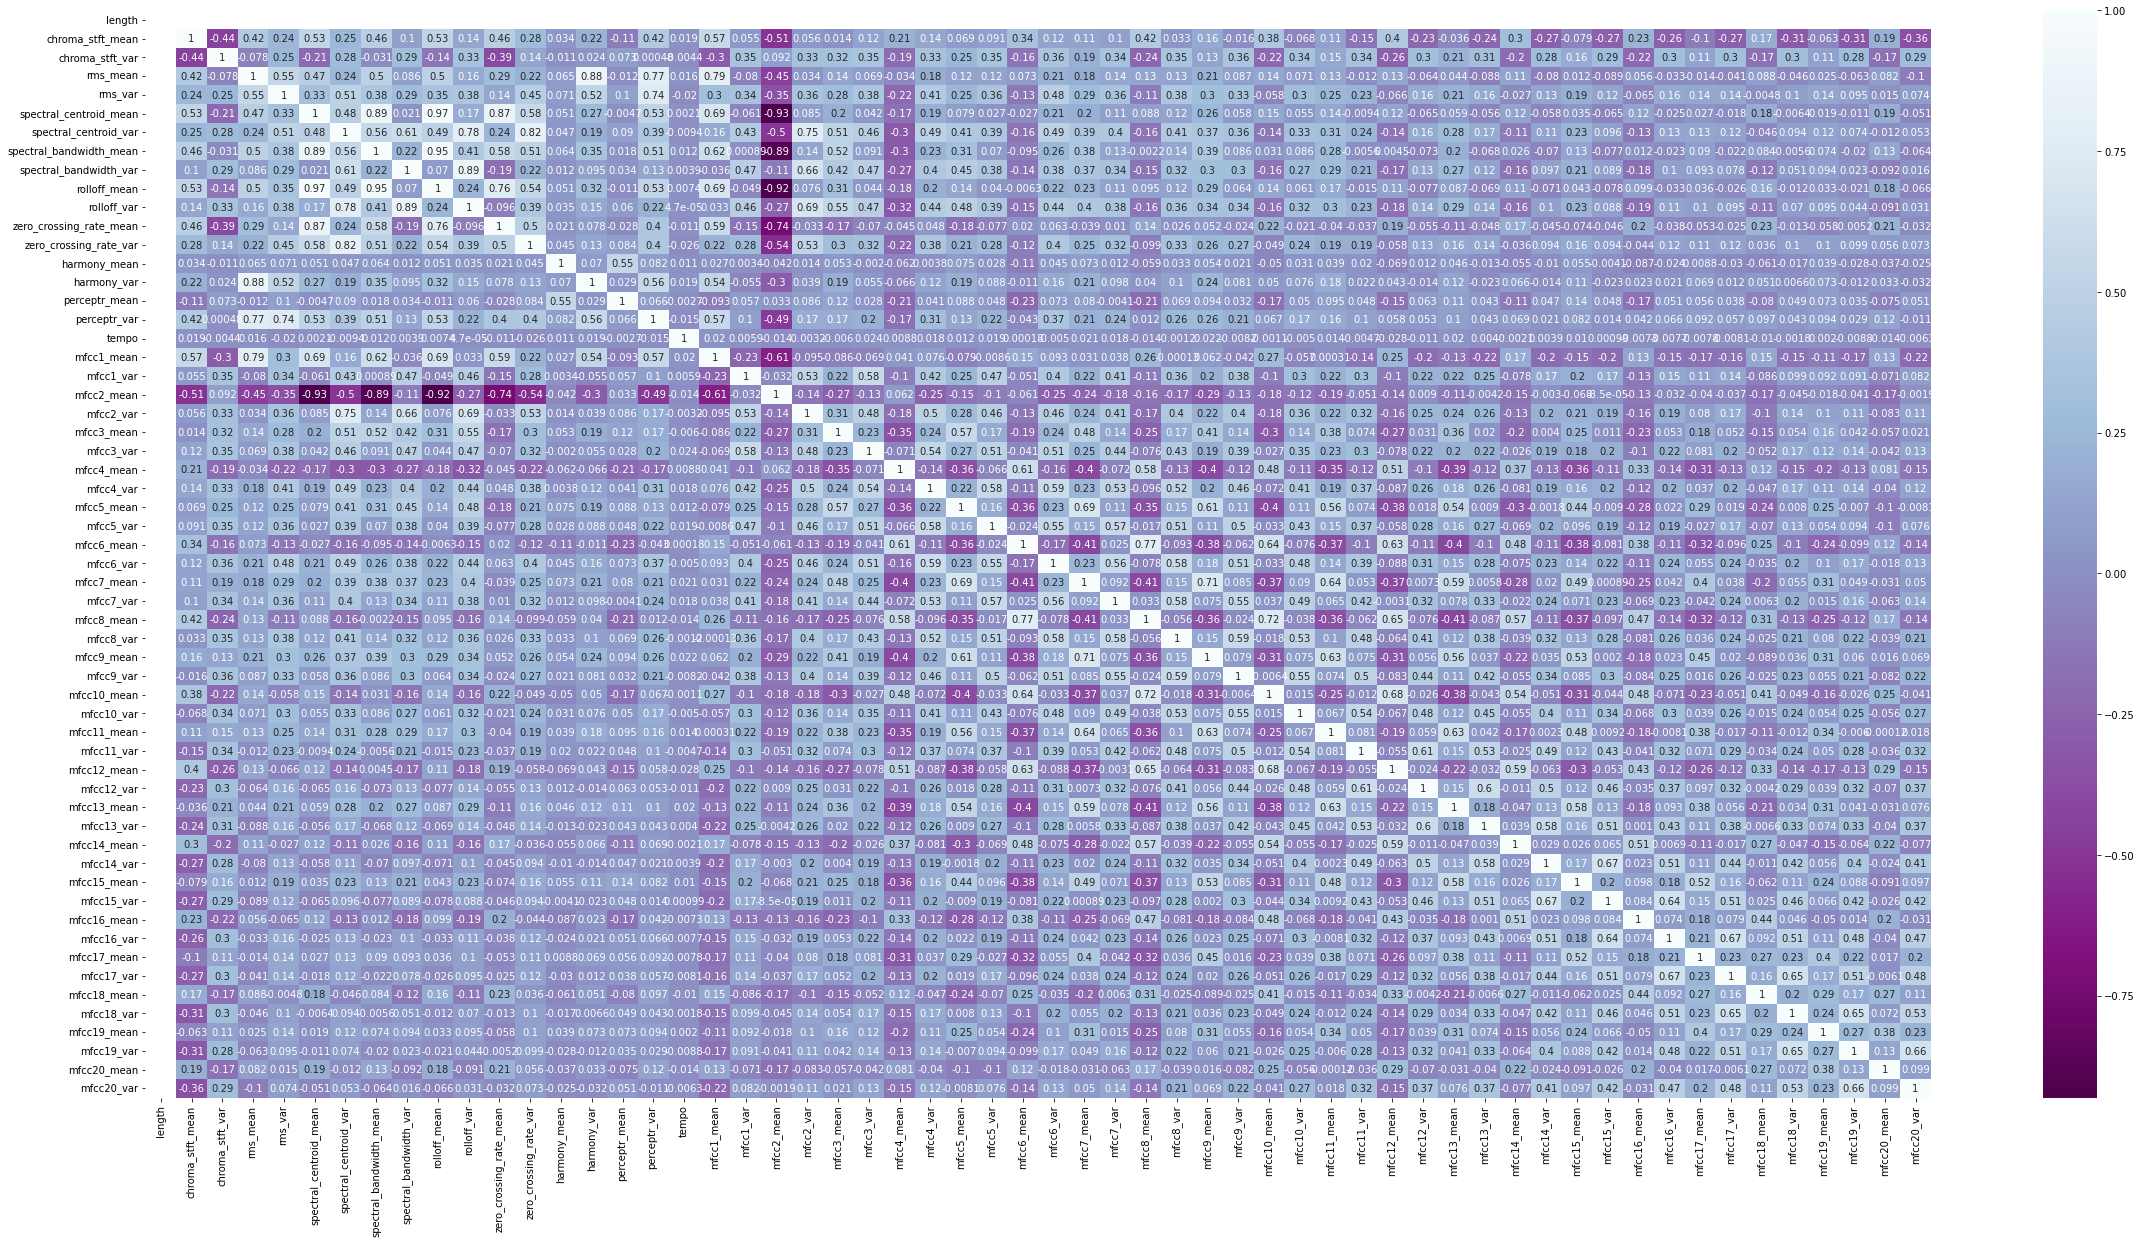

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20)) 
corr=df.corr()
import seaborn as sns
sns.heatmap(corr,annot=True,cmap='BuPu_r')

**Dependent and independent feature**

In [28]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

**Feature Scaling**

In [29]:

sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [30]:
X = pd.DataFrame(X_scaled, columns = X.columns)

In [31]:
X.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0     0.0         -0.487808         0.640520 -0.006624  0.235568   
1     0.0         -0.403142         0.131835 -0.264944 -0.342134   
2     0.0         -0.361694         0.764491  0.016695  0.542195   
3     0.0         -0.175714         0.205477  0.024885 -0.063820   
4     0.0         -0.485895         0.337521  0.181345 -0.272072   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -0.566828              -0.572791                -0.493983   
1               -0.508798              -0.749862                -0.425382   
2               -0.546245              -0.701852                -0.288365   
3               -0.723482              -0.700599                -0.517344   
4               -0.756246              -0.774827                -0.538557   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0               -0.009229     -0.518590  ...    -0.750122   -0.299108   
1               -0.519010     -0.424118  ...     0.457983    0.428544   
2               -0.425734     -0.346190  ...     0.585548    0.503695   
3               -0.348881     -0.607665  ...    -0.489524   -0.065309   
4               -0.572962     -0.667537  ...     0.112417   -0.570609   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0     0.168647   -0.425137    -0.003423   -0.376938    -0.499464   -0.513562   
1    -0.327031   -0.310040    -0.112125   -0.032083    -0.066593    1.011384   
2     0.428053   -0.648762     0.316311   -0.177372     0.109337   -0.046244   
3     0.062981   -0.649076     0.092384   -0.464121    -0.211882   -0.099501   
4     0.856651   -0.167089     0.183265   -0.029476    -0.175130   -0.678995   

   mfcc20_mean  mfcc20_var  
0     0.128414   -0.291781  
1     1.275780    0.056425  
2     0.653907   -0.521458  
3     0.865880   -0.544744  
4     0.276899   -0.606692  

[5 rows x 58 columns]

**Principal Compenent Analysis**

In [32]:
# Top 3 pca components

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principal_final = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3'])

In [33]:
# concatenate with target label
Df = pd.concat([principal_final, y], axis = 1)

In [34]:
Df.head()

PC1       PC2       PC3  label
0 -1.833467  0.433795  0.643635  blues
1 -2.661324  0.303197  1.618622  blues
2 -1.845995  0.121902  0.487165  blues
3 -2.484775  0.246942  0.824260  blues
4 -3.043281  0.221820  0.574022  blues

Text(0, 0.5, 'Principal Component 2')

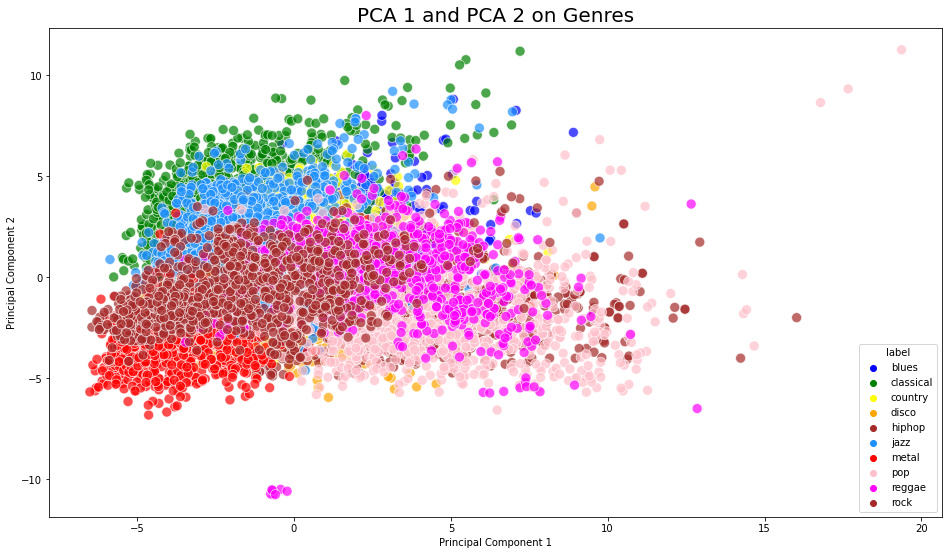

In [35]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC2", data =Df, hue = "label",palette=['blue','green','yellow','orange','brown','dodgerblue','red','pink','magenta','brown'], legend='full', alpha = 0.7, s = 100);

plt.title('PCA 1 and PCA 2 on Genres', fontsize = 20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")



Text(0, 0.5, 'Principal Component 3')

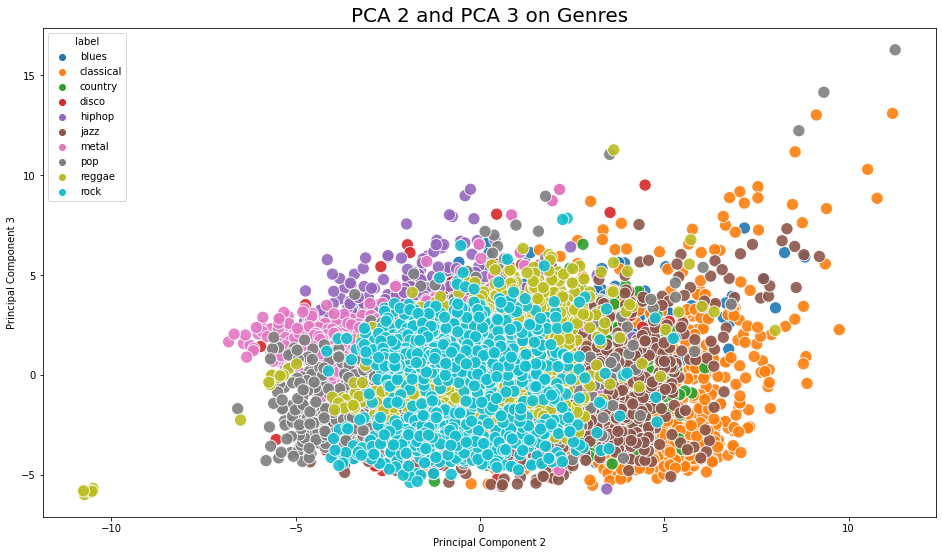

In [36]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC2", y = "PC3", data = Df, hue = "label", alpha = 0.9, s = 150);
plt.title('PCA 2 and PCA 3 on Genres', fontsize = 20)
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 3")



Text(0, 0.5, 'Principal Component 3')

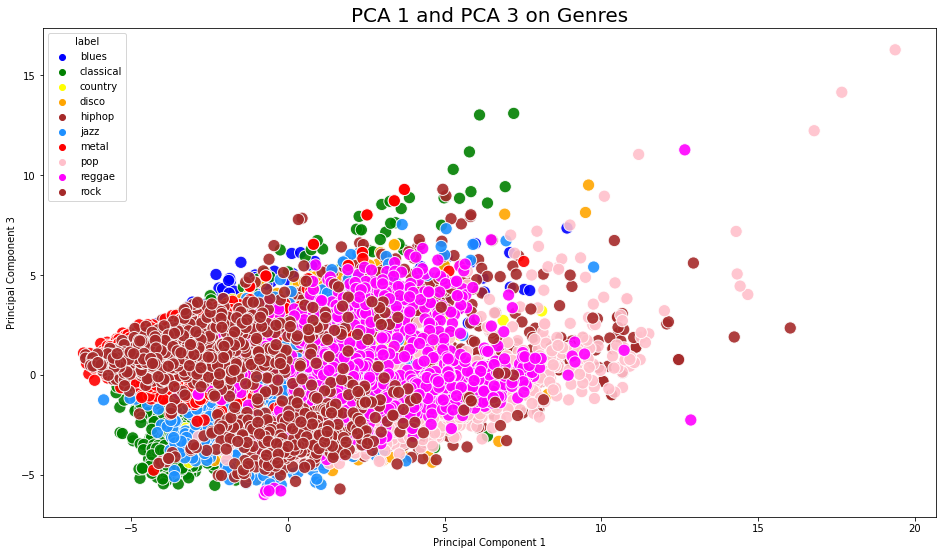

In [37]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC3", data = Df, hue = "label",palette=['blue','green','yellow','orange','brown','dodgerblue','red','pink','magenta','brown'], legend='full', alpha = 0.9, s = 150);
plt.title('PCA 1 and PCA 3 on Genres', fontsize = 20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")



**Train Test Split**


In [38]:
from sklearn.model_selection import train_test_split
# split into train dev and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# **Modeling**

**Random Forest Classifier**

In [39]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(X_train,y_train) 

RandomForestClassifier()

In [40]:
y_pred_train=Rf.predict(X_train)

**Prediction on unseen data**

In [41]:
y_pred_test=Rf.predict(X_test)


In [42]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae','rock'],  yticklabels=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae','rock'] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Performance of training data**

              precision    recall  f1-score   support

       blues       1.00      1.00      1.00       690
   classical       1.00      1.00      1.00       689
     country       1.00      1.00      1.00       706
       disco       1.00      1.00      1.00       706
      hiphop       1.00      1.00      1.00       684
        jazz       1.00      1.00      1.00       706
       metal       0.99      1.00      1.00       713
         pop       1.00      1.00      1.00       695
      reggae       1.00      1.00      1.00       710
        rock       1.00      0.99      1.00       694

    accuracy                           1.00      6993
   macro avg       1.00      1.00      1.00      6993
weighted avg       1.00      1.00      1.00      6993



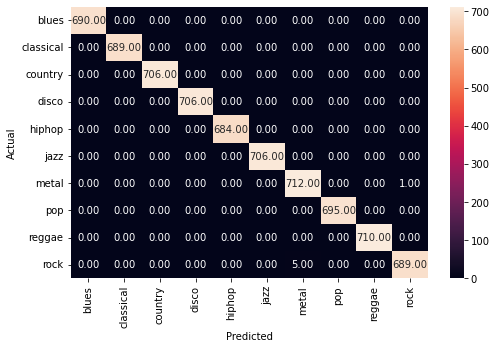

In [43]:
metrics_score(y_train, y_pred_train)

**Performance of test data**

              precision    recall  f1-score   support

       blues       0.89      0.85      0.86       310
   classical       0.95      0.96      0.95       309
     country       0.73      0.84      0.78       291
       disco       0.83      0.83      0.83       293
      hiphop       0.93      0.83      0.88       314
        jazz       0.85      0.90      0.87       294
       metal       0.87      0.93      0.90       287
         pop       0.92      0.90      0.91       305
      reggae       0.81      0.88      0.85       290
        rock       0.85      0.68      0.76       304

    accuracy                           0.86      2997
   macro avg       0.86      0.86      0.86      2997
weighted avg       0.86      0.86      0.86      2997



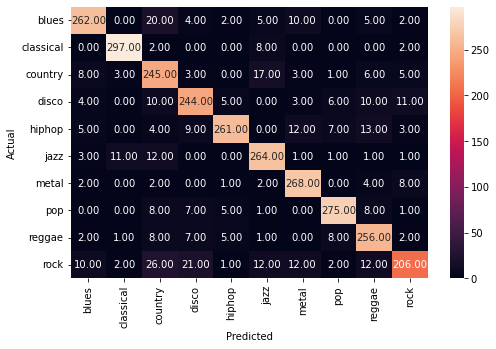

In [44]:
metrics_score(y_test, y_pred_test)

**Training and testing Accuracy**

In [45]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(Rf.score(X_train,y_train)))

print("Test set score: {:.4f}".format(Rf.score(X_test,y_test)))

Training set score: 0.9991
Test set score: 0.8602


**Precision,Recall and f1 score**

In [46]:
print("the precsion score is : ",precision_score(y_test, y_pred_test,average='micro'))
print("the recall score is :",recall_score(y_test, y_pred_test,average='micro'))
print("the f1 measure is ",f1_score(y_test, y_pred_test,average='micro'))

the precsion score is :  0.8601935268601936
the recall score is : 0.8601935268601936
the f1 measure is  0.8601935268601936


**Feature Importance**

<AxesSubplot:>

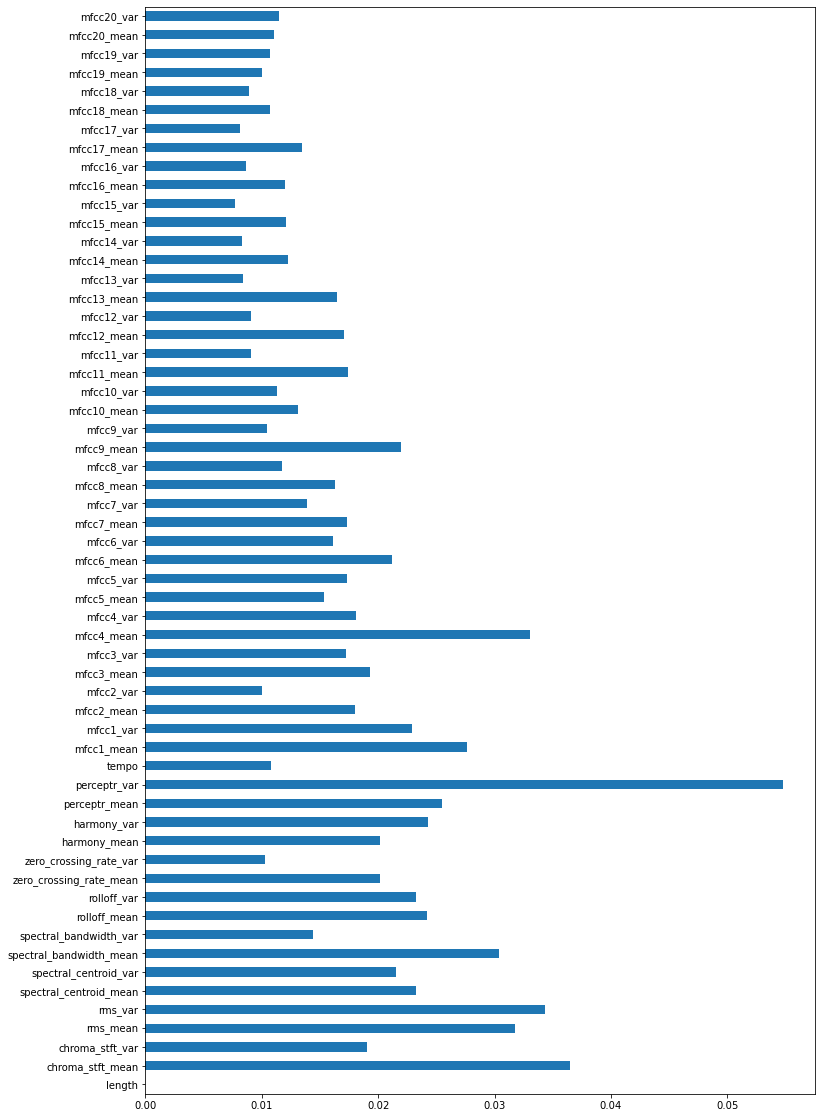

In [47]:
# extract feature importances, convert into a Series
importances = pd.Series(Rf.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,20))